## Project Name: Customer Churn Prediction

Problem Statement: 
Customer churn is a crucial concern for businesses across sectors. Understanding customer behaviors, 
identifying key factors contributing to churn, and predicting when customers are likely to churn are vital 
for reducing revenue loss and enhancing customer retention strategies. 

Problem Type: Classification Supervised ML with ANN

Dataset : The dataset contains the following columns: 
`customerID`: Customer ID 
`gender`: Customer's gender 
`SeniorCitizen`: Whether the customer is a senior citizen (1 for yes, 0 for no) 
`Partner`: Whether the customer has a partner 
`Dependents`: Whether the customer has dependents 
`tenure`: Number of months the customer has stayed with the company 
`PhoneService`: Whether the customer has phone service 
`MultipleLines`: Whether the customer has multiple phone lines 
`InternetService`: Type of internet service 
`OnlineSecurity`: Whether the customer has online security 
`OnlineBackup`: Whether the customer has online backup 
`DeviceProtection`: Whether the customer has device protection 
`TechSupport`: Whether the customer has tech support 
`StreamingTV`: Whether the customer streams TV 
`StreamingMovies`: Whether the customer streams movies 
`Contract`: Type of contract (e.g., month-to-month, one year, two years) 
`PaperlessBilling`: Whether the customer uses paperless billing 
`PaymentMethod`: Payment method (e.g., electronic check, mailed check) 
`MonthlyCharges`: Monthly charges 
`TotalCharges`: Total charges 
`Churn`: Target variable, indicating whether the customer churned (1 for yes, 0 for no)

In [1]:
# Create an environment to reading, understanding, and visualization

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import missingno as msno
from scipy import stats 

import warnings
warnings.filterwarnings('ignore') 

In [2]:
path = r"G:\Github-2025\customer_churn_ML_ANN\data_set\Customer_Churn.csv"
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

# Preprocessing

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

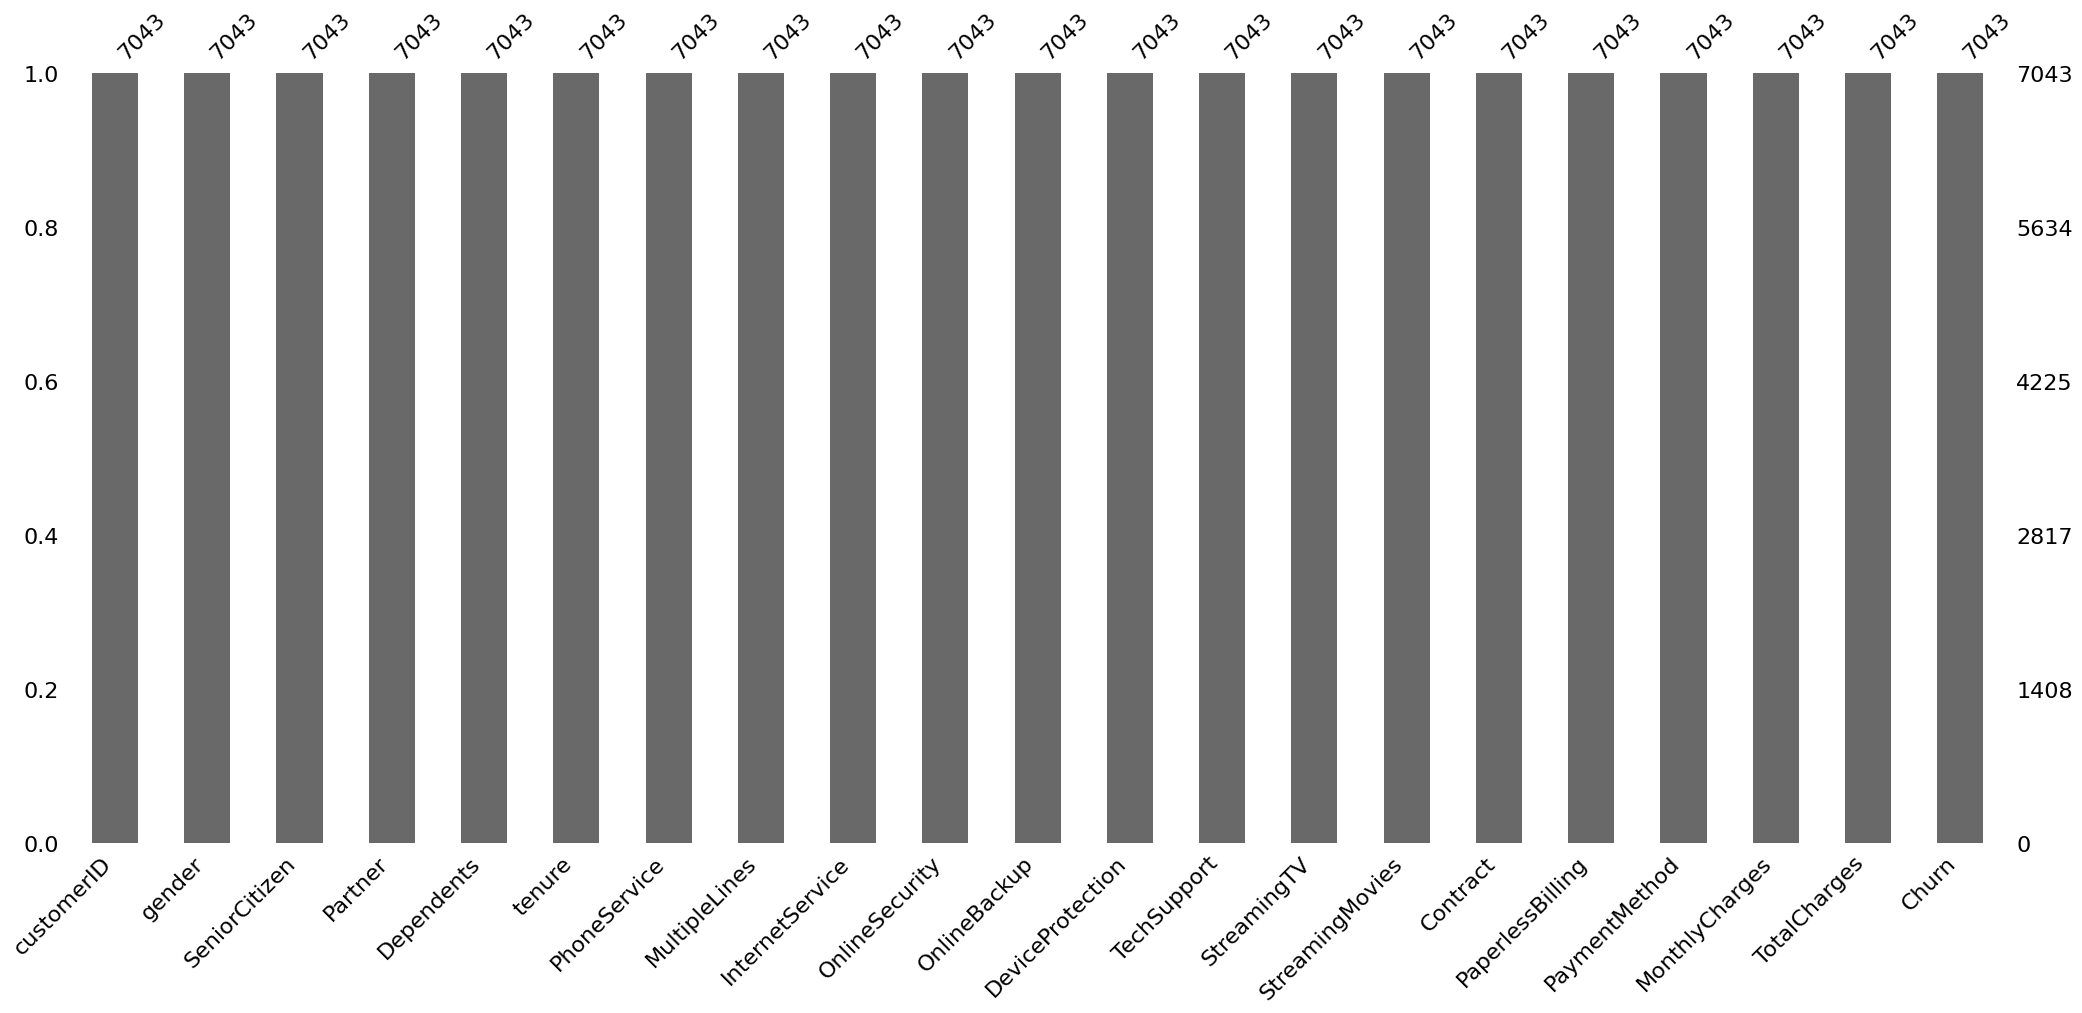

In [5]:
#visualize missing values with missingno library
msno.bar(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here, SeniorCitizen feature is intiger type, TotalCharges is object type. So check this two.

In [7]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [8]:
# 'SeniorCitizen' feature has binary. So, change its category.
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [9]:
df['TotalCharges'].unique() 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
# 'TotalCharges' feature has string plus object. So change its data type.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
null_count = df.isnull().sum()/len(df)
null_per = ((df.isnull().sum()/len(df))*100).round(2)
result = pd.DataFrame({"Null Counts":null_count, "Null Percentage":null_per})
result

,Null Counts,Null Percentage
customerID,0.000000,0.00
gender,0.000000,0.00
SeniorCitizen,0.000000,0.00
Partner,0.000000,0.00
Dependents,0.000000,0.00
tenure,0.000000,0.00
PhoneService,0.000000,0.00
MultipleLines,0.000000,0.00
InternetService,0.000000,0.00
OnlineSecurity,0.000000,0.00


In [13]:
# 'TotalCharges' features null values below 5% so, remove null.
df.dropna(inplace = True)

In [14]:
df.shape

(7032, 21)

In [15]:
for col in df:
      print(col)
      print(df[col].unique())
      print('-'*50)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender
['Female' 'Male']
--------------------------------------------------
SeniorCitizen
['No' 'Yes']
--------------------------------------------------
Partner
['Yes' 'No']
--------------------------------------------------
Dependents
['No' 'Yes']
--------------------------------------------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
--------------------------------------------------
PhoneService
['No' 'Yes']
--------------------------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Online

In [16]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [17]:
# Customer ID is so complicated. drop it
df.drop(columns="customerID", inplace=True)

In [18]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA

In [19]:
# for EDA first define columns as data types

cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include='number').columns

print(f'Categorical_feature={cat_features} \n Numerical_features={num_features}')

Categorical_feature=Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object') 
 Numerical_features=Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


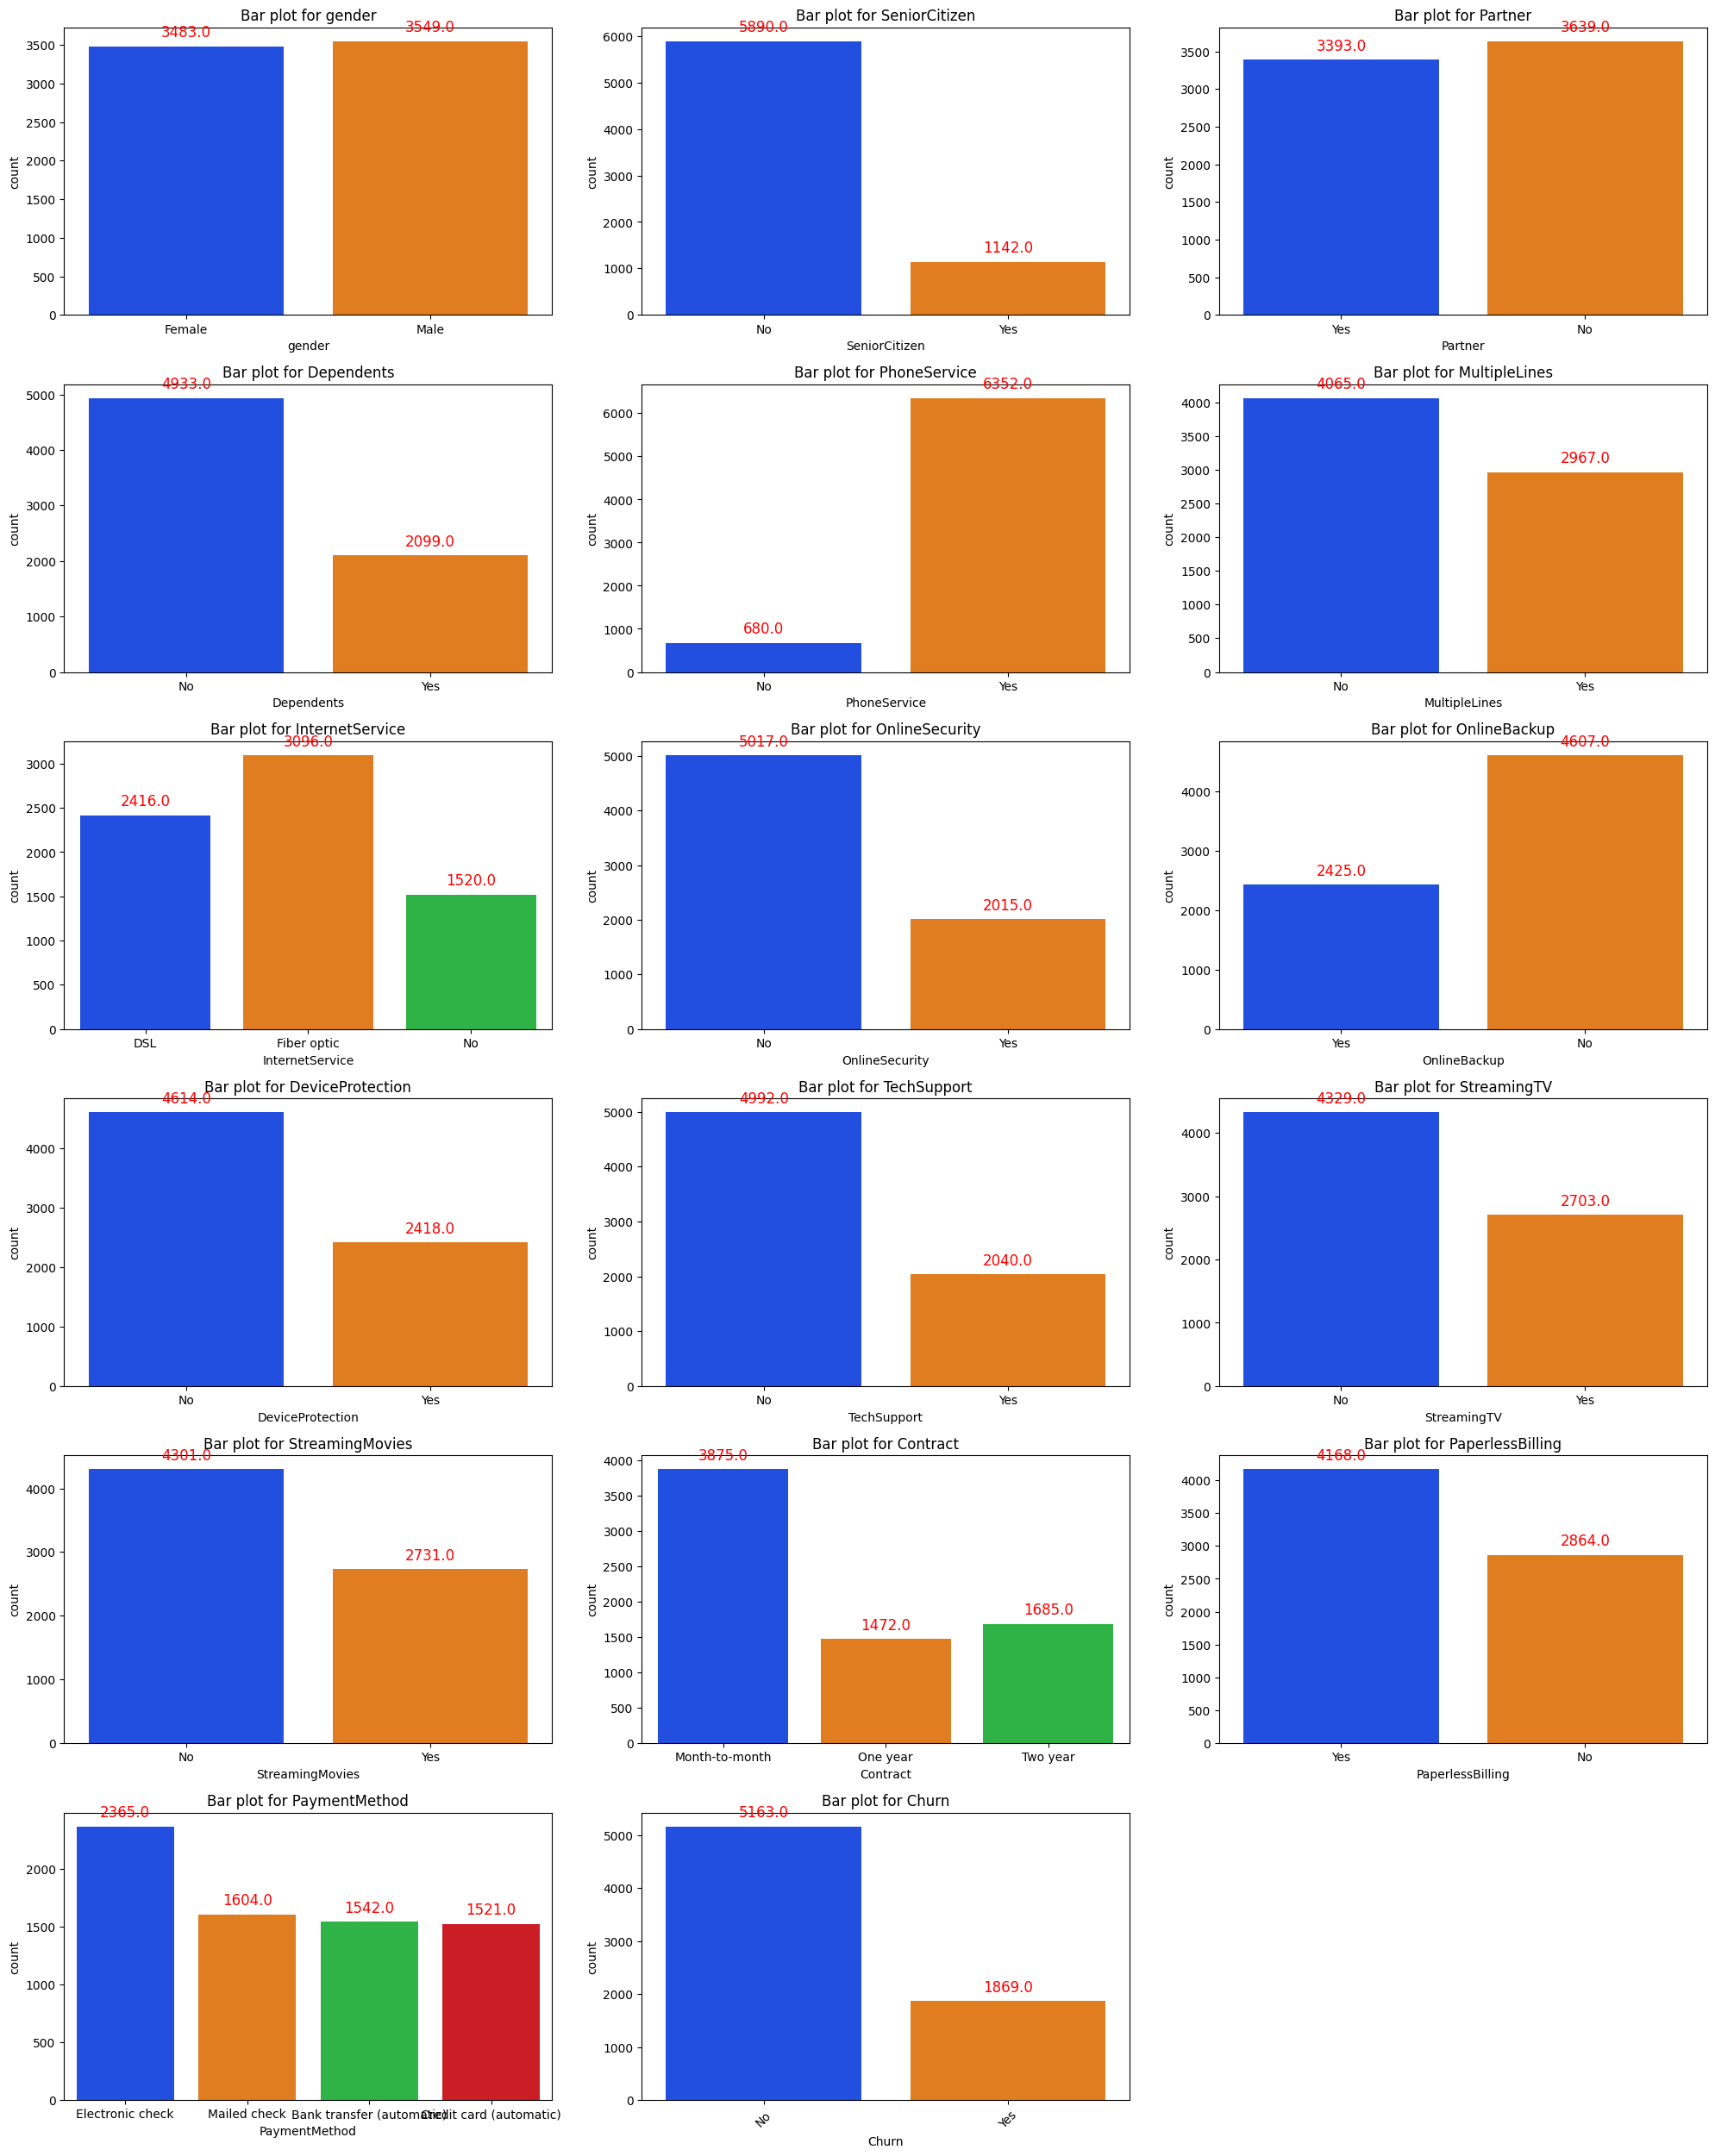

In [20]:
cat_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20,25))

for i, col in enumerate(cat_to_plot,1):
      plt.subplot(6,3,i)
      ax = sns.countplot(x=df[col], palette='bright')
      plt.title(f"Bar plot for {col}")

    # Annotating the counts
      for j in ax.patches:
        height = j.get_height()
        ax.annotate(f'{height}', (j.get_x() + j.get_width() / 2., height), ha='center',
                    va='bottom', fontsize=12, color='red', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

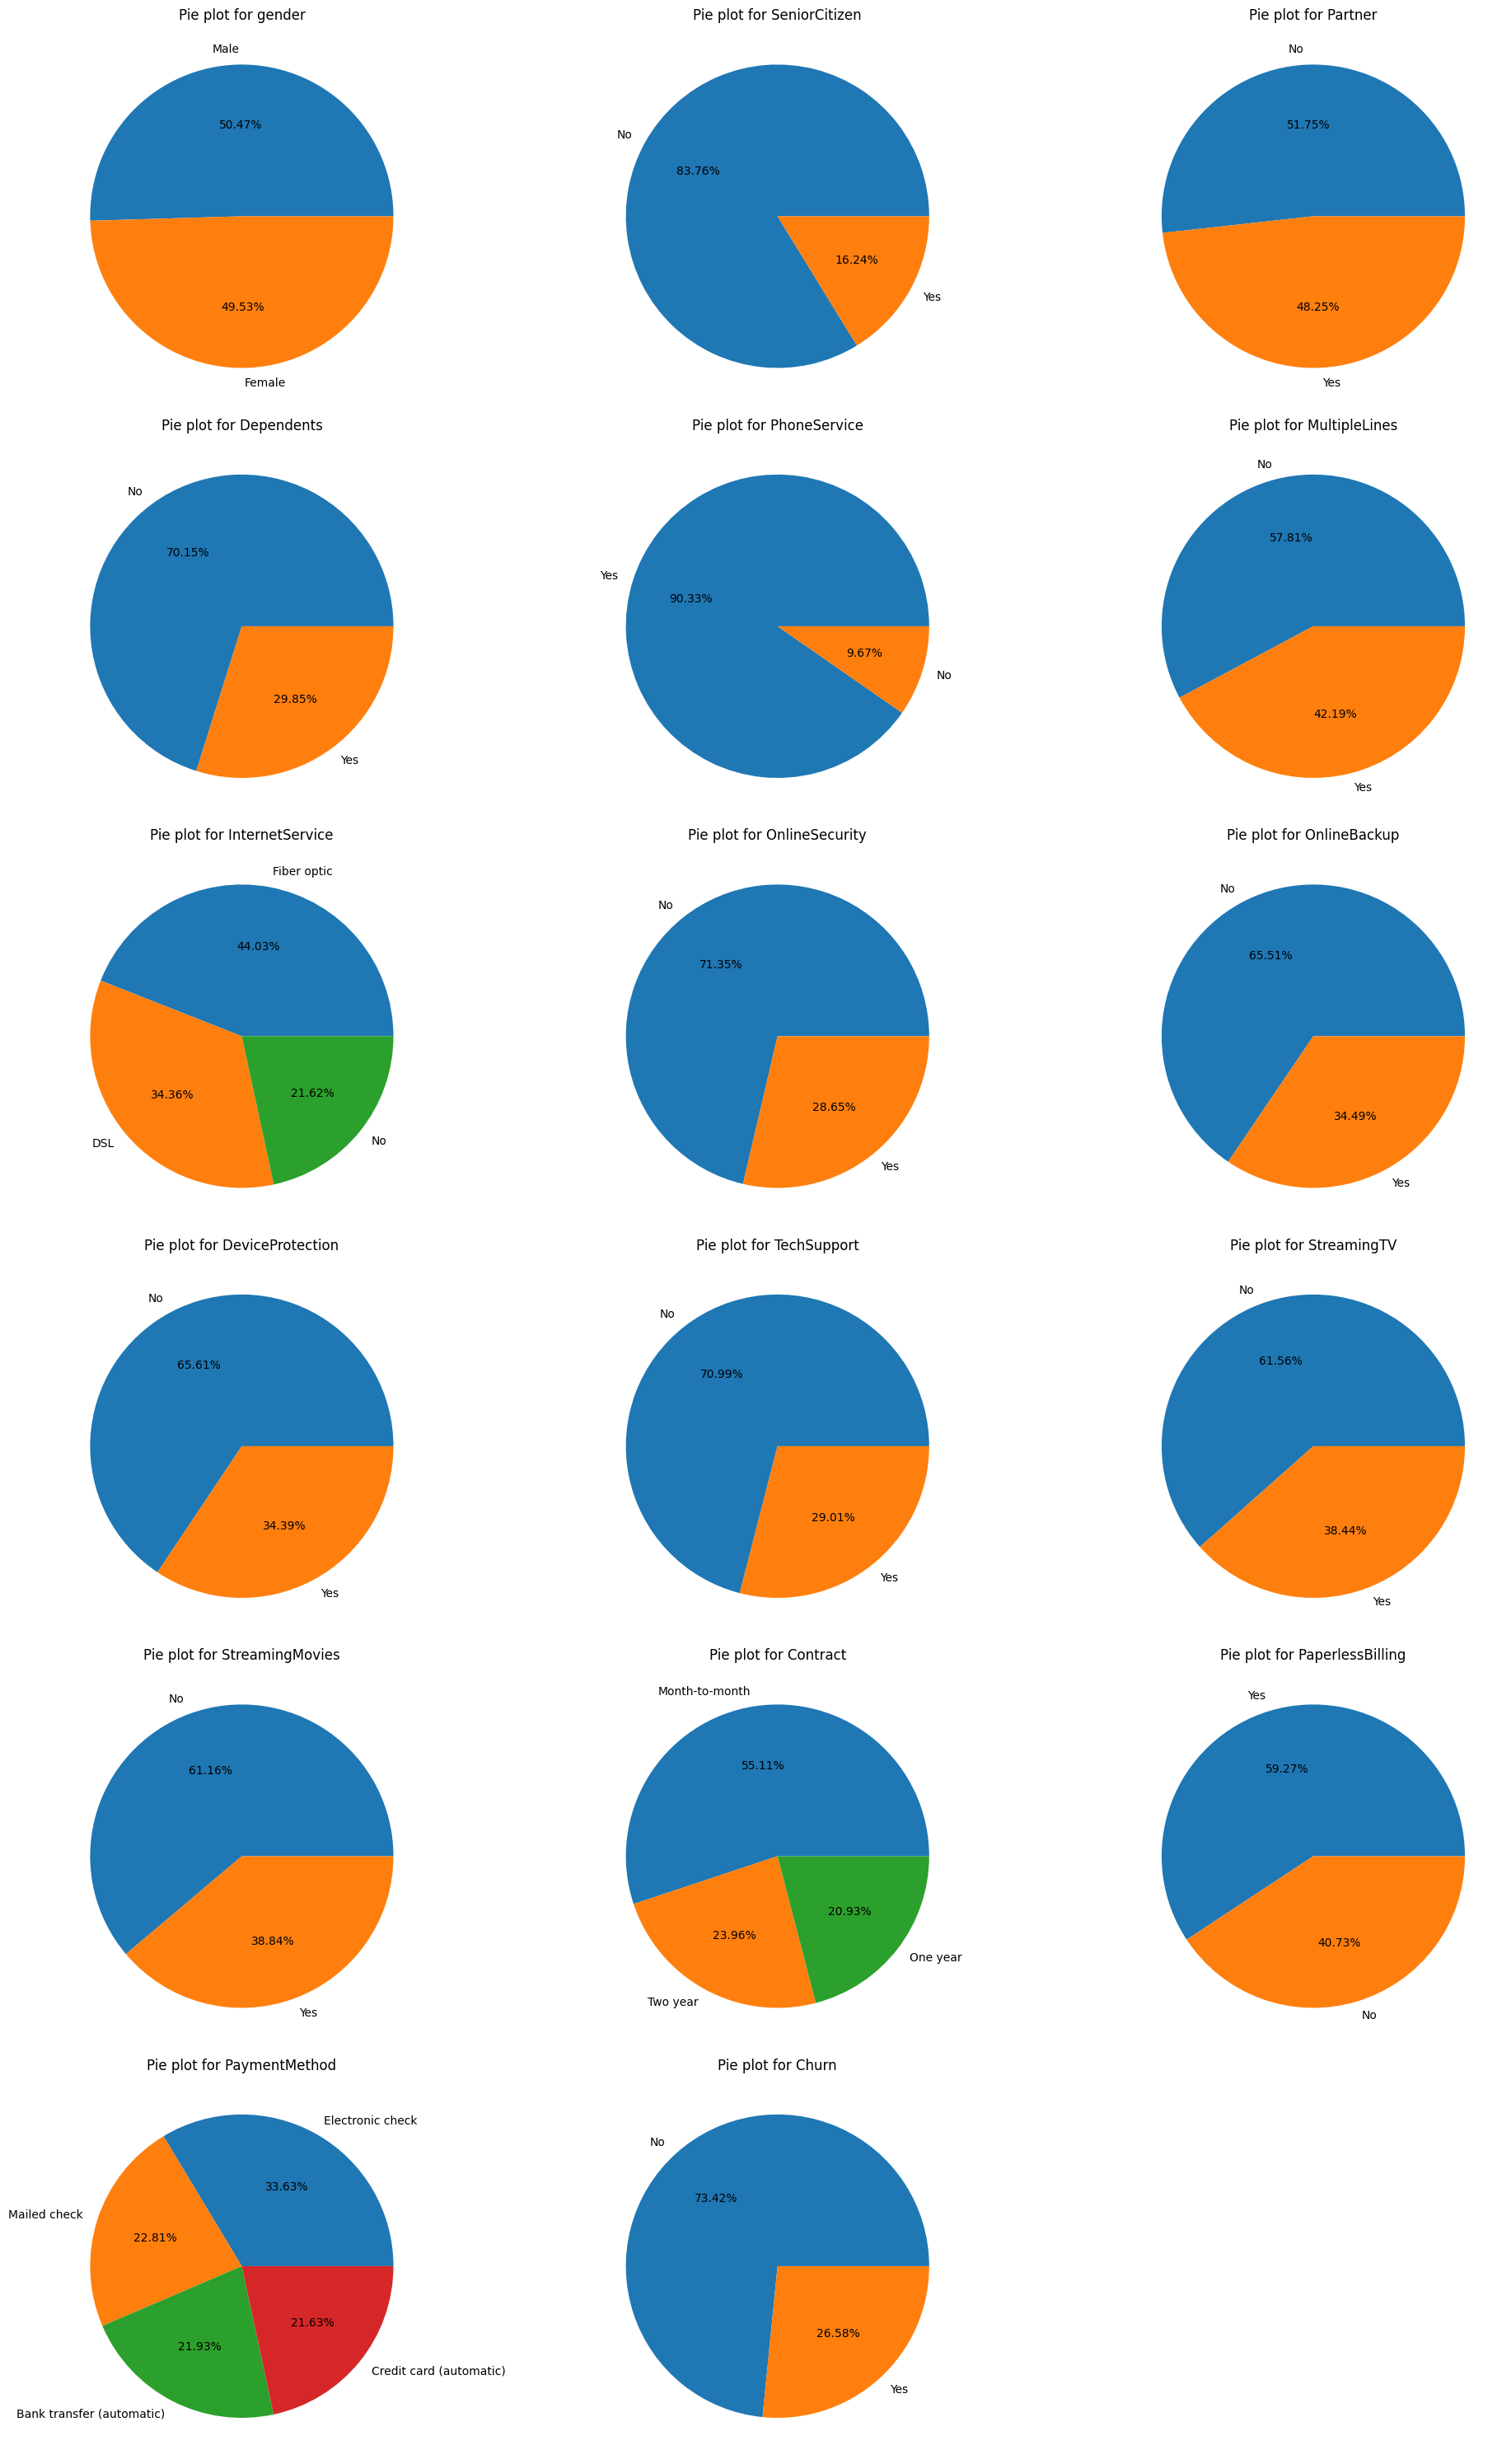

In [21]:
cat_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20,30))

for i, col in enumerate(cat_to_plot,1):
    plt.subplot(6,3,i)
    values = df[col].value_counts()
    ax = plt.pie(x=values, labels=values.index, autopct='%1.2f%%')
    plt.title(f"Pie plot for {col}")

plt.tight_layout()
plt.show()

Company's customer behavior does not significantly differ based on gender, partnership status, or age; however, fewer senior citizens tend to utilize the service.

The majority of customers do not opt for online security, multiple lines, online backup, device protection, tech support, streaming TV, or streaming movies.

Most customers prefer fiber optic internet connection, phone service, month-to-month contracts, paperless billing, and electronic payment methods.

Churn rate is 26.58%. 

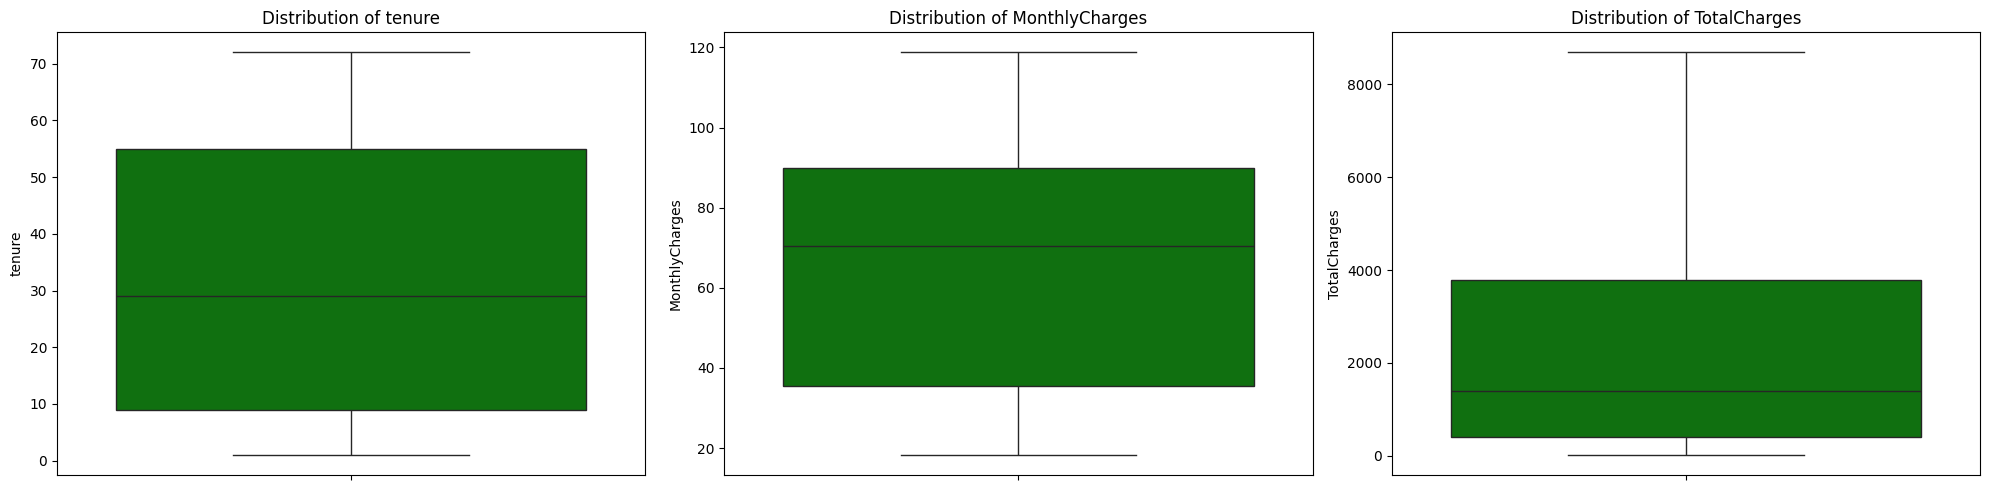

In [22]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 5))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df[col], color='green')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

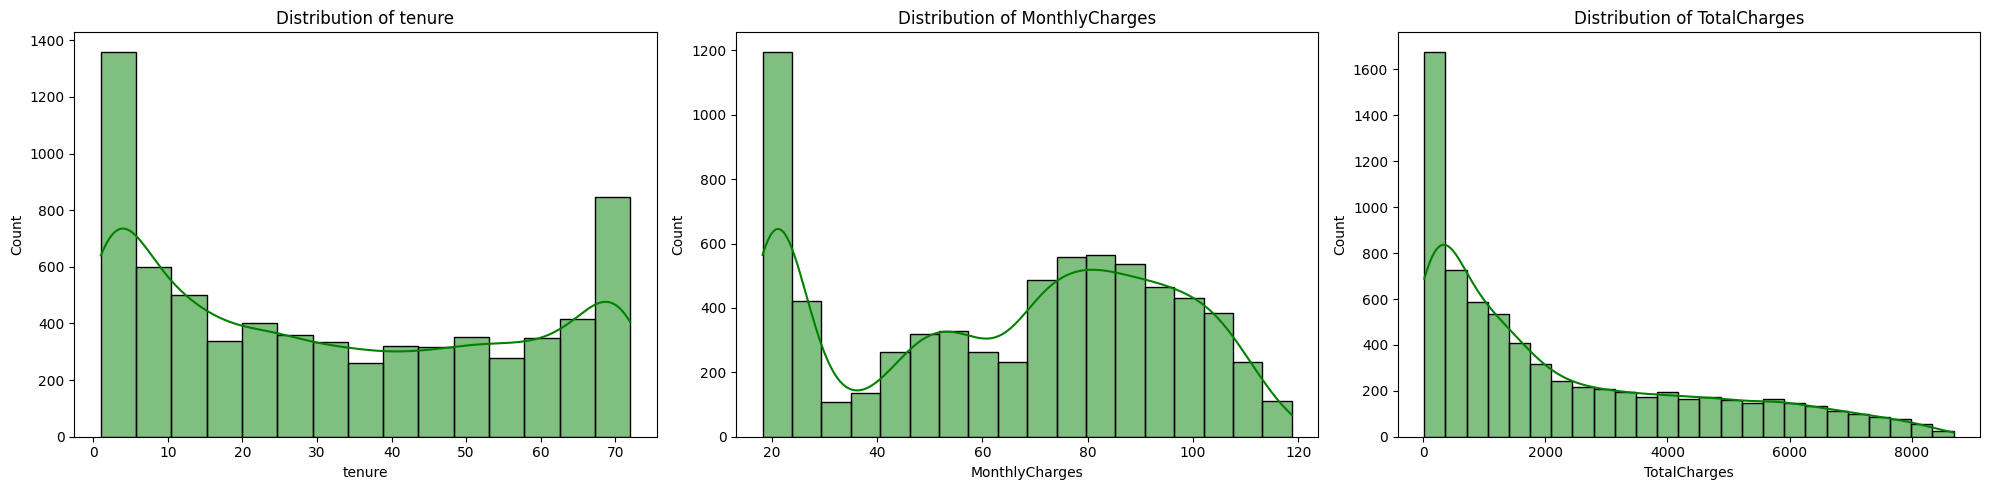

In [23]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 5))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='green')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [24]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

from scipy import stats
for col in numerical_features:
      skewness = df[col].skew()
      if skewness >0:
            skew_type = "Right Skewed"
      elif skewness <0:
            skew_type = "Left Skewed"
      else:
            skew_type = "Approximately Normal"
      print(f'Features = {col} : skewness = {skewness} Distribution = {skew_type}')  

Features = tenure : skewness = 0.23773083190513133 Distribution = Right Skewed
Features = MonthlyCharges : skewness = -0.22210292770166232 Distribution = Left Skewed
Features = TotalCharges : skewness = 0.9616424997242504 Distribution = Right Skewed


# Bivariate Analysis

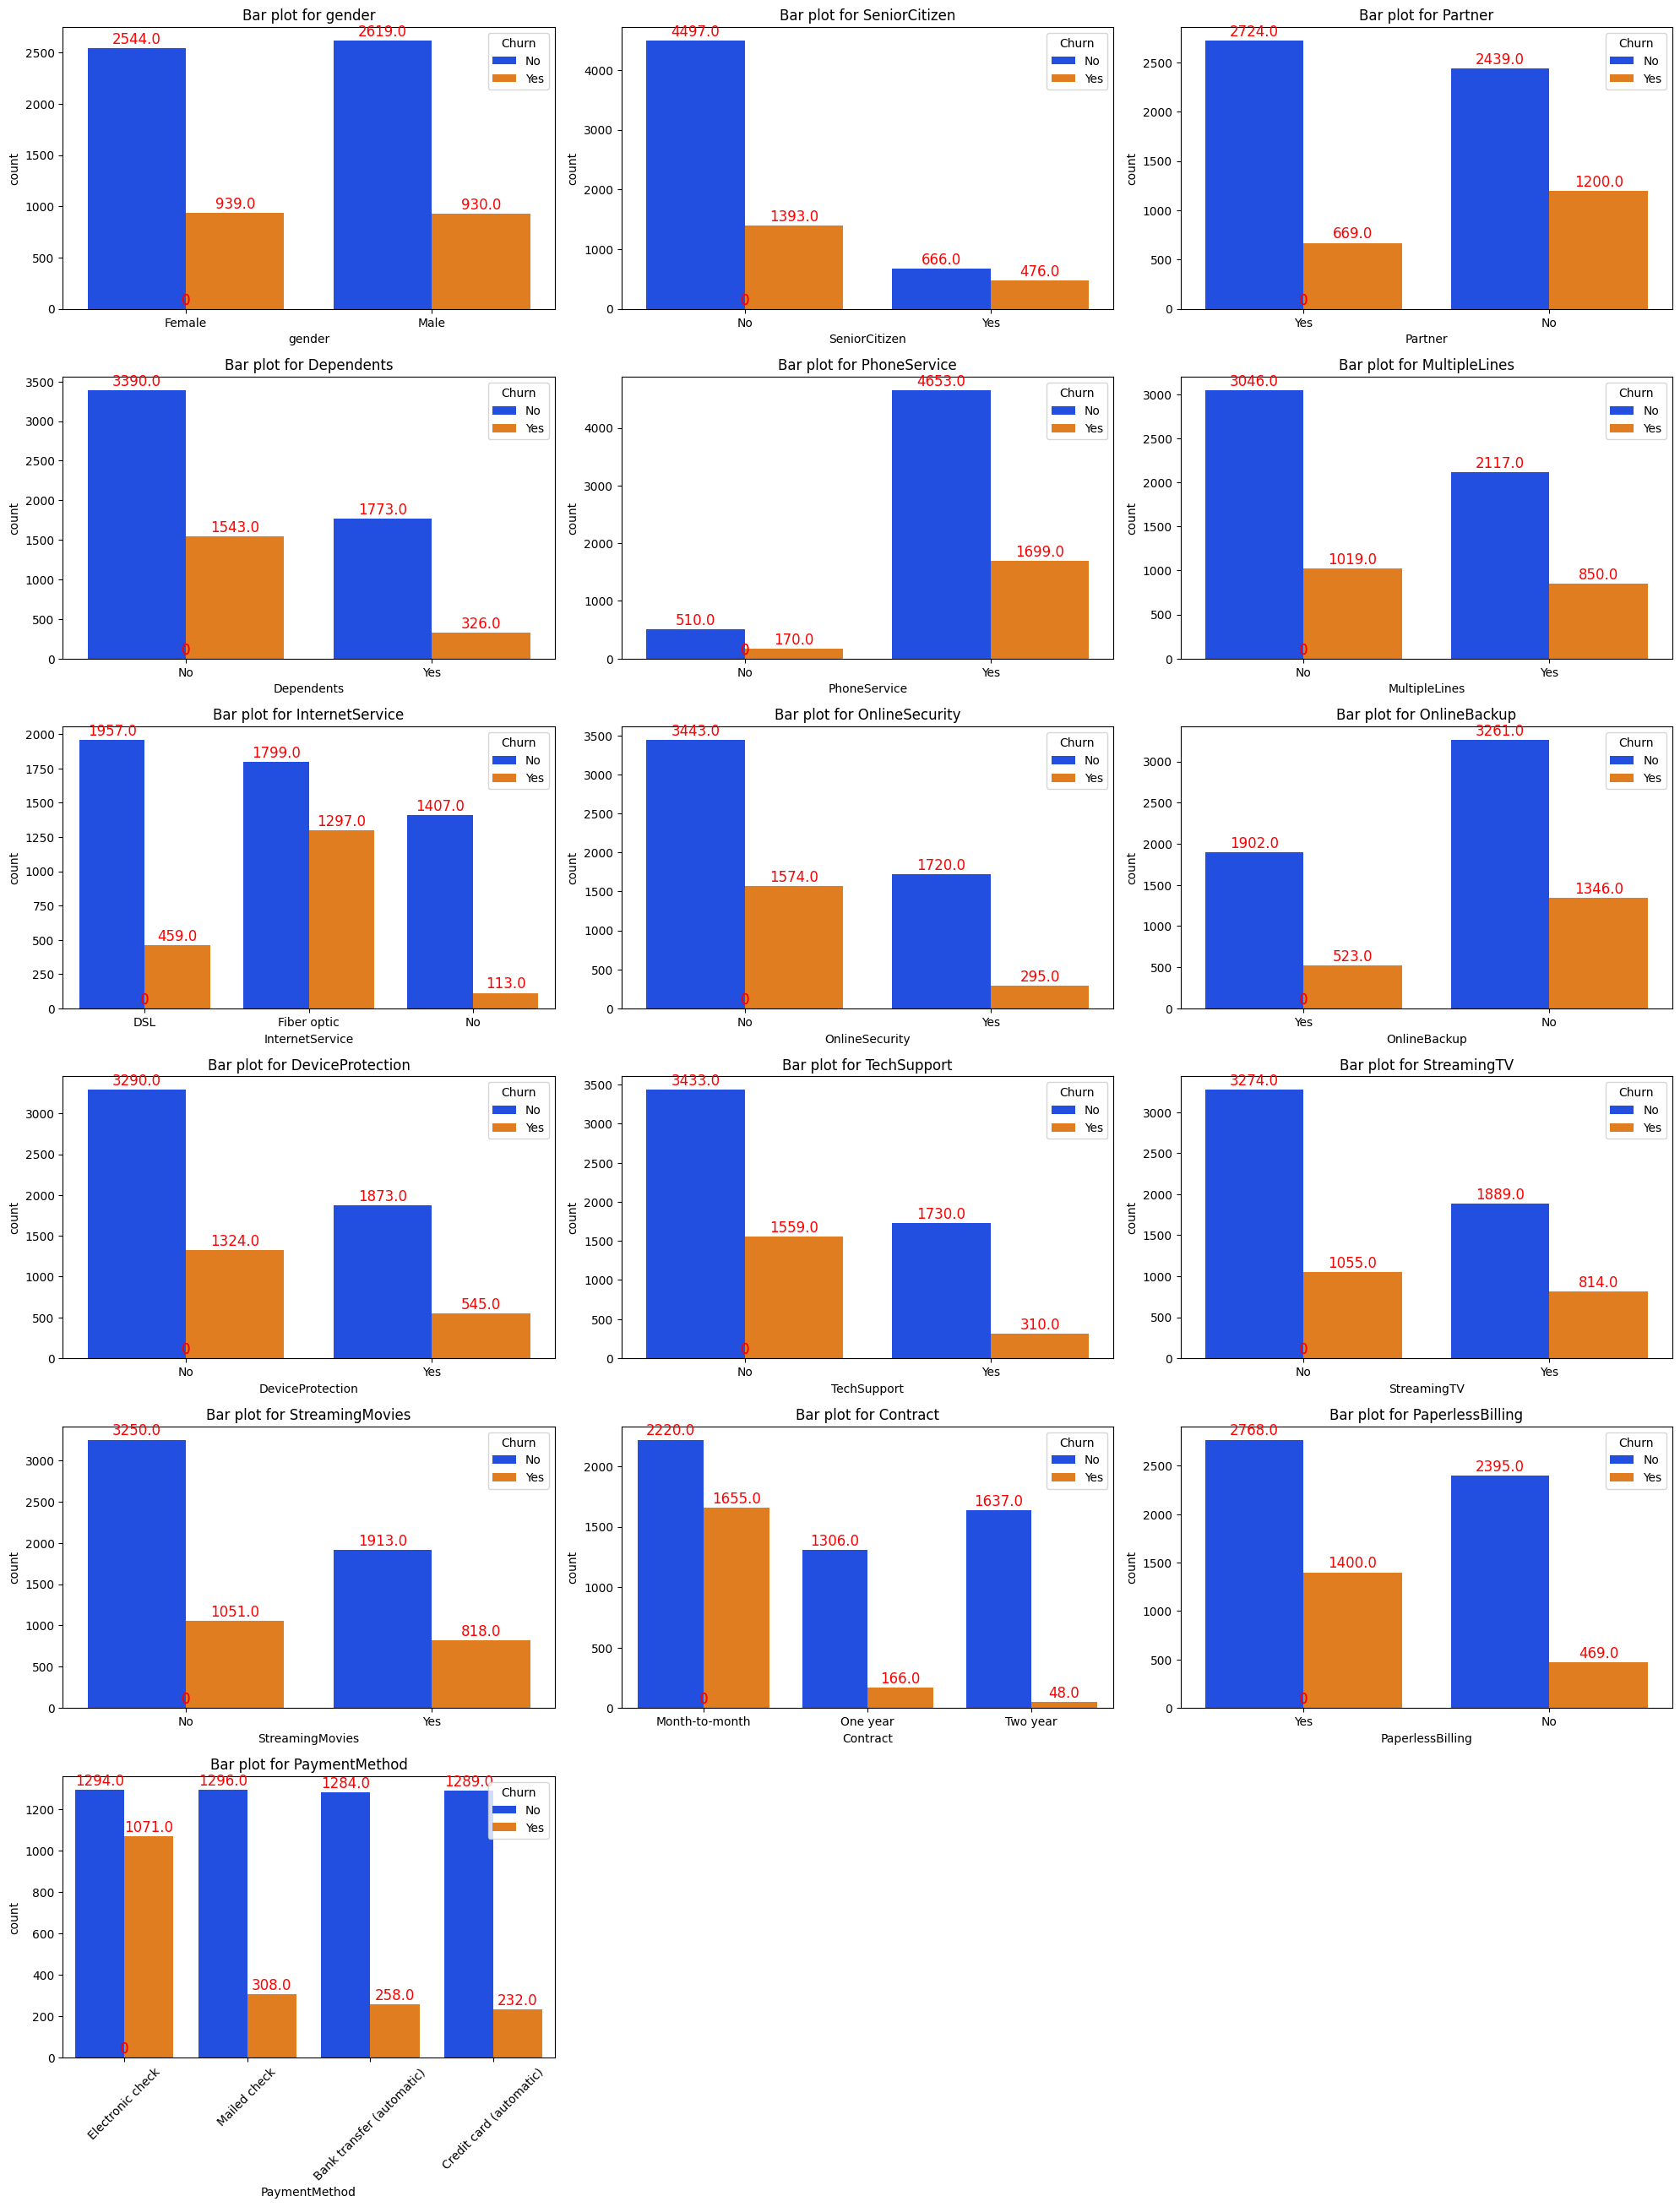

In [25]:
cat_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 25))

for i, col in enumerate(cat_to_plot, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(x=col, data=df, hue='Churn', palette='bright')
    plt.title(f"Bar plot for {col}")
    
    # Annotating the counts
    for j in ax.patches:
        height = j.get_height()
        ax.annotate(f'{height}', (j.get_x() + j.get_width() / 2., height), ha='center',
                    va='bottom', fontsize=12, color='red', xytext=(0, 1),
                    textcoords='offset points')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

The churn rate is higher among customers who did not utilize support, streaming TV, streaming movies, device protection, online backup, online security, multiple lines, dependents, or partners. Additionally, customers who used phone services, electronic check for payment, paperless billing, or opted for month-to-month contracts showed higher churn rates.

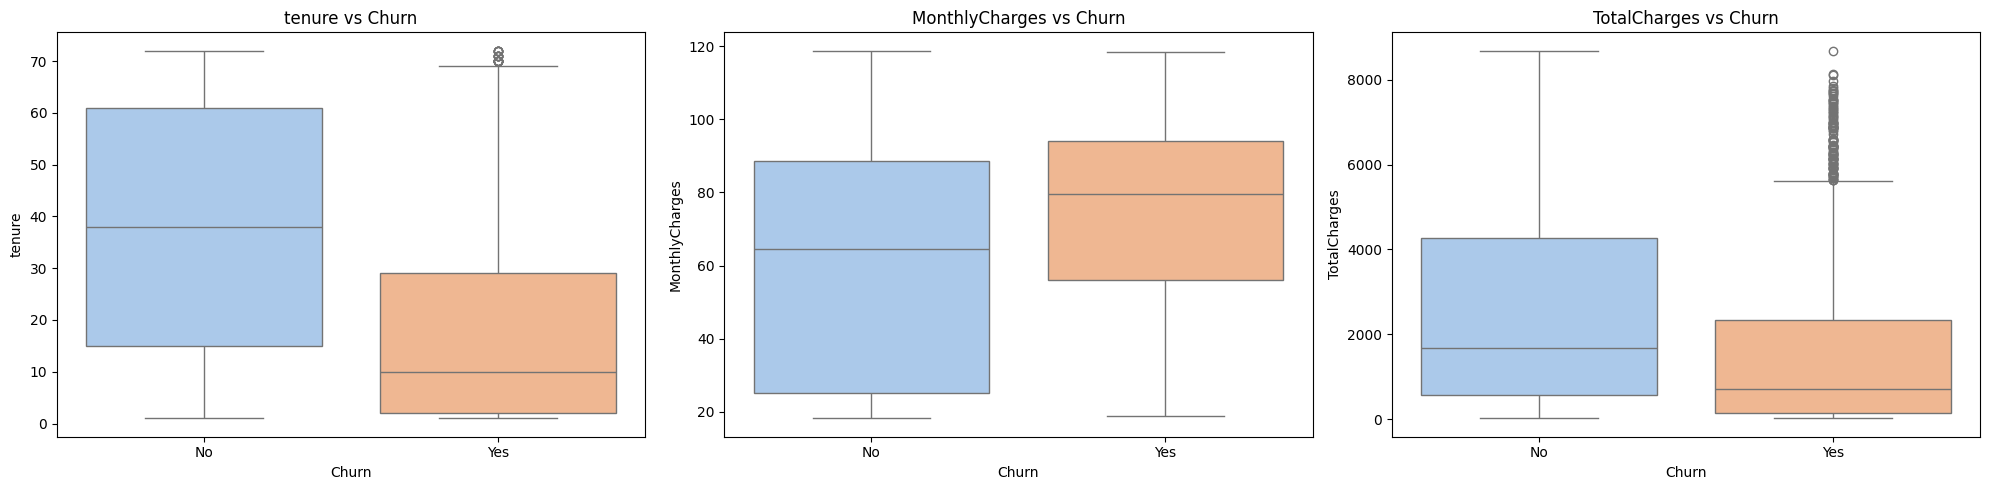

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 5))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

# Feature Engineering

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

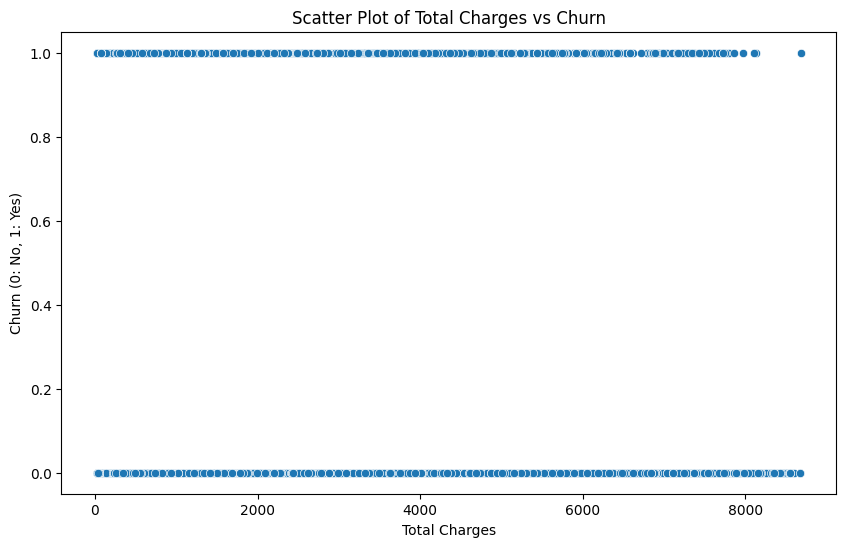

In [28]:
plt.figure(figsize=(10, 6))

# Create scatter plot for 'TotalCharges' vs 'Churn_numeric'
sns.scatterplot(x='TotalCharges', y='Churn', data=df, palette='Set1')

plt.title('Scatter Plot of Total Charges vs Churn')
plt.xlabel('Total Charges')
plt.ylabel('Churn (0: No, 1: Yes)')

plt.show()

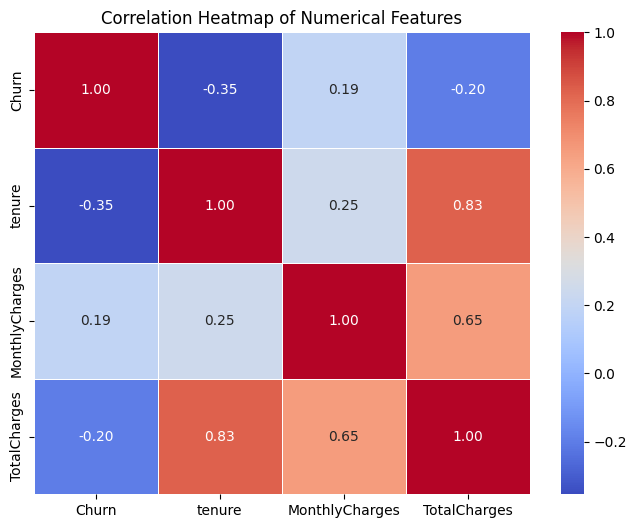

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Churn','tenure', 'MonthlyCharges', 'TotalCharges']

# Compute the correlation matrix
correlation = df[numerical_features].corr()

plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


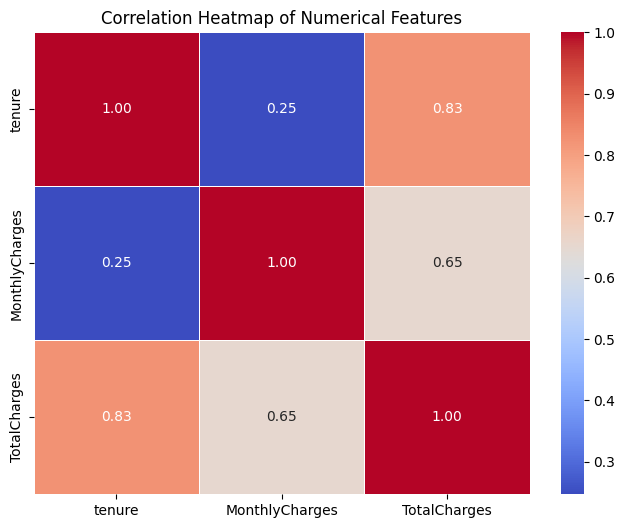

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute the correlation matrix
correlation = df[numerical_features].corr()

print(correlation)

plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [31]:
# Obiviously tenure * Monthly charges = Total charges. For the multicollinearity remove tenure and Monthely charges.
df.drop(columns=['tenure','MonthlyCharges'], inplace= True)

In [32]:
from scipy.stats import chi2_contingency

# Initialize an empty list to store the results
results = []

# Iterate over each categorical feature in df1
for feature in df.select_dtypes(include='object').columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    
    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Determine whether to accept or reject null hypothesis based on p-value
    if p_value <= 0.05:  # Using a significance level of 0.05
        hypothesis_status = 'Reject Null Hypothesis'
    else:
        hypothesis_status = 'Accept Null Hypothesis'
    
    # Append the results to the list
    results.append({'Feature': feature,
                    'Chi-squared statistic': round(chi2, 2),
                    'p-value': round(p_value, 6),
                    'Hypothesis Status': hypothesis_status})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

             Feature  Chi-squared statistic   p-value       Hypothesis Status
0             gender                   0.48  0.490488  Accept Null Hypothesis
1      SeniorCitizen                 158.44  0.000000  Reject Null Hypothesis
2            Partner                 157.50  0.000000  Reject Null Hypothesis
3         Dependents                 186.32  0.000000  Reject Null Hypothesis
4       PhoneService                   0.87  0.349924  Accept Null Hypothesis
5      MultipleLines                  11.09  0.000869  Reject Null Hypothesis
6    InternetService                 728.70  0.000000  Reject Null Hypothesis
7     OnlineSecurity                 205.42  0.000000  Reject Null Hypothesis
8       OnlineBackup                  47.25  0.000000  Reject Null Hypothesis
9   DeviceProtection                  30.50  0.000000  Reject Null Hypothesis
10       TechSupport                 189.97  0.000000  Reject Null Hypothesis
11       StreamingTV                  27.84  0.000000  Reject Nu

In [33]:
from scipy.stats import f_oneway

# Define the numerical features and the categorical features
numerical_features = ['TotalCharges']
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Initialize an empty list to store the results
anova_results = []

# Iterate over each categorical feature
for cat_feature in categorical_features:
    # Iterate over each numerical feature
    for num_feature in numerical_features:
        # Group the numerical data by the categorical feature
        groups = df.groupby(cat_feature)[num_feature].apply(list)
        
        # Perform ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        
        # Determine whether to accept or reject null hypothesis based on p-value
        if p_value <= 0.05:  # Using a significance level of 0.05
            hypothesis_status = 'Reject Null Hypothesis'
        else:
            hypothesis_status = 'Accept Null Hypothesis'
        
        # Append the results to the list
        anova_results.append({'Categorical Feature': cat_feature,
                              'Numerical Feature': num_feature,
                              'F-statistic': round(f_statistic, 2),
                              'p-value': round(p_value, 6),
                              'Hypothesis Status': hypothesis_status})

# Convert the list of dictionaries to a DataFrame
anova_results_df = pd.DataFrame(anova_results)

# Display the ANOVA results DataFrame
anova_results_df

,Categorical Feature,Numerical Feature,F-statistic,p-value,Hypothesis Status
0,gender,TotalCharges,0.00,0.9968,Accept Null Hypothesis
1,SeniorCitizen,TotalCharges,74.51,0.0000,Reject Null Hypothesis
2,Partner,TotalCharges,796.83,0.0000,Reject Null Hypothesis
3,Dependents,TotalCharges,29.51,0.0000,Reject Null Hypothesis
4,PhoneService,TotalCharges,90.94,0.0000,Reject Null Hypothesis
5,MultipleLines,TotalCharges,1982.83,0.0000,Reject Null Hypothesis
6,InternetService,TotalCharges,796.69,0.0000,Reject Null Hypothesis
7,OnlineSecurity,TotalCharges,1442.47,0.0000,Reject Null Hypothesis
8,OnlineBackup,TotalCharges,2472.60,0.0000,Reject Null Hypothesis
9,DeviceProtection,TotalCharges,2645.27,0.0000,Reject Null Hypothesis


Both cases gender accept null hypothesis. So remove gender.

In [34]:
df.drop(columns=['gender'], inplace=True)

In [35]:
clean_df = df.copy()

clean_df.to_csv(r"G:\Github-2025\customer_churn_ML_ANN\data_set\clean_df.csv", index= False)